# **Metode Klasifikasi**

## **1. Read Data Set**

Quantitative Attributes:

1.  x1 = T_F 	
2.  x2 = T_T
3.  x3 = STRETCH_DIP
4.  x4 = STRETCH_STRETCH
5.  x5 = ADULT_ADULT

Classification (y): 
1. ADULT
2. CHILD

reference:

yello-small.data from https://archive.ics.uci.edu


### 1.1 Import library

In [39]:
import pandas as pd
import numpy as np

### 1.2 Menampilkan Data Set

In [40]:
# Load dataset
dataset = pd.read_csv("/content/yellow-small.data")
dataset = dataset.dropna()

df_encoded = pd.get_dummies(dataset, columns=['T', 'YELLOW', 'SMALL', 'STRETCH', 'ADULT'])
df_encoded = df_encoded.drop(['YELLOW_PURPLE', 'YELLOW_YELLOW', 'SMALL_LARGE', 'SMALL_SMALL'], axis=1)

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

data_olah = df_encoded
data_olah.head()

,T_F,T_T,STRETCH_DIP,STRETCH_STRETCH,ADULT_ADULT,ADULT_CHILD
0,0,1,0,1,0,1
1,0,1,1,0,1,0
2,0,1,1,0,0,1
3,0,1,0,1,1,0
4,0,1,0,1,0,1


### 1.3 Split Data

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Jumlah data train:',len(X_train))
print('Jumlah data test :',len(X_test))

Jumlah data train: 14
Jumlah data test : 5


### 1.4 Visualisasi Data

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt

## Set theme ##
sn.set_theme(style='darkgrid')

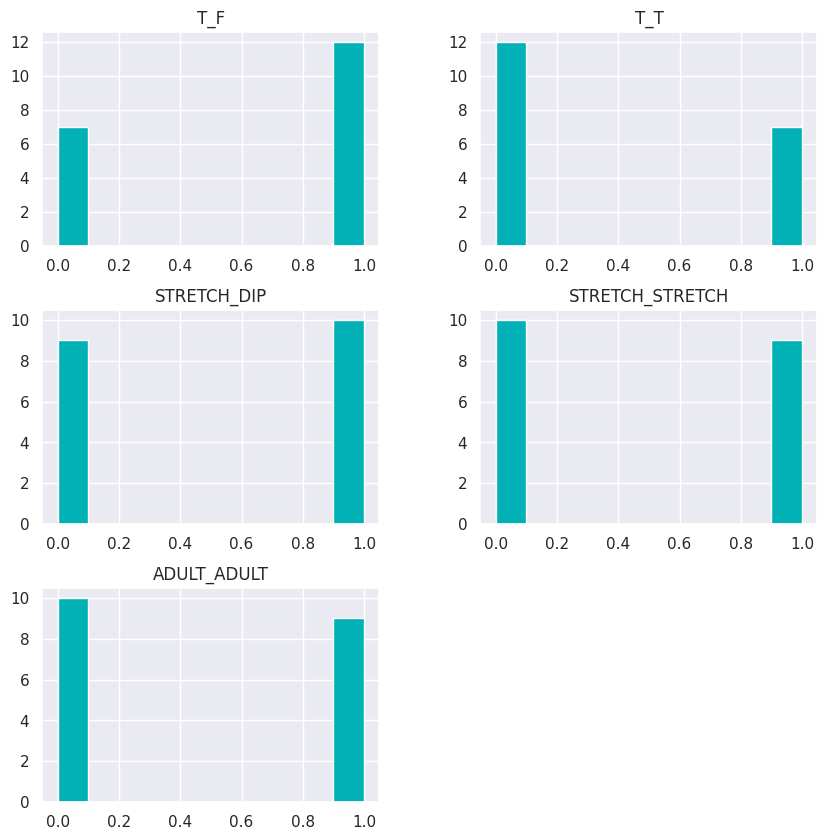

In [43]:
## Visualisasi Data X ##
data_olah.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

In [44]:
## Visualisasi Data Y

## membuat variabel baru Y untuk menyimpan uniq dari y ##
Y = []
for i in pd.unique(y):
    Y.append(i)
    
nY = []
tmp0 = 0; #index#
for i in Y:
    nY.append(0)
    for j in y:
        if j == i:
            nY[tmp0] += 1    
    tmp0 += 1

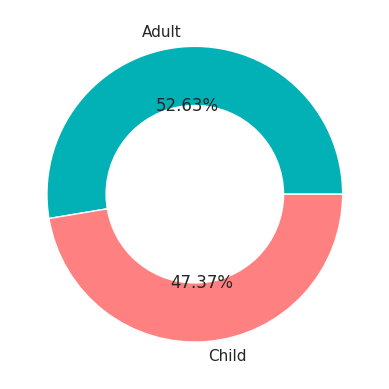

In [45]:
names = ['Adult', 'Child']
marks = nY
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(marks, labels=names, autopct='%.2f%%', colors=['#01b1b5', '#FF8080'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

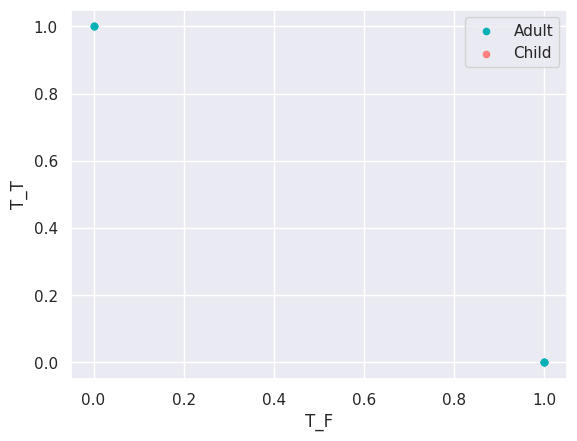

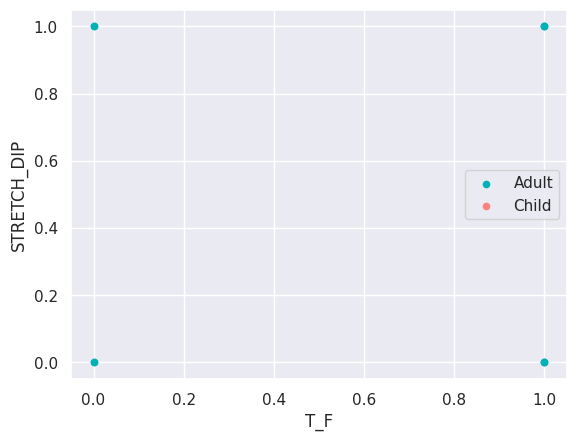

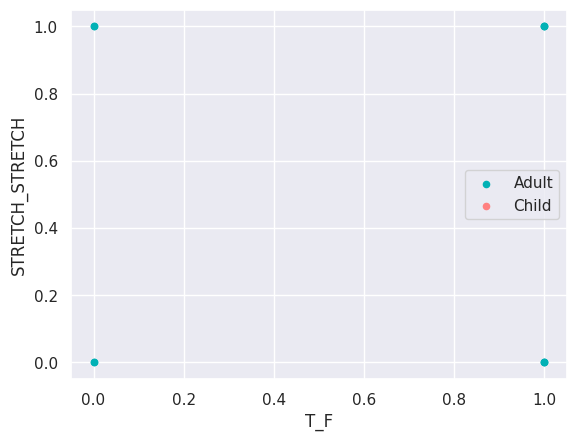

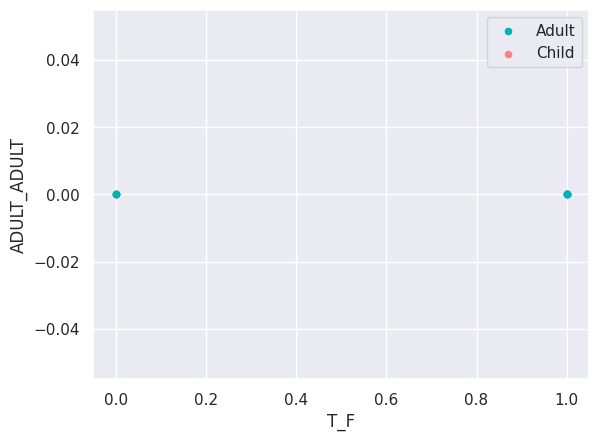

In [46]:
## Visualisasi Hubungan ADULT_CHILD dengan Variabel lain ##

tmp0 = 0
for i in data_olah.columns:
    if (tmp0 > 0) and (tmp0 < len(data_olah.columns)-1):
        ax = data_olah[data_olah['ADULT_CHILD'] == 1].plot(kind='scatter',
                                                      x='T_F', 
                                                      y=i,
                                                      color='#01b1b5', 
                                                      label='Adult');
        data_olah[data_olah['ADULT_CHILD'] == 2].plot(kind='scatter', 
                                                         x='T_F', 
                                                         y=i, 
                                                         color='#FF8080', 
                                                         label='Child', 
                                                         ax=ax);
        plt.show()
    tmp0 += 1

## **2. Metode Klasifikasi**

### 2.1 k – Nearest Neighbor (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [48]:
knn_method = KNeighborsClassifier()
knn_method.fit(X_train, y_train)
y_pred_knn = knn_method.predict(X_test)
score_knn = metrics.accuracy_score(y_pred_knn, y_test)
print('Akurasi Prediksi method K-NN : ',round(score_knn,8), ' atau ',round(score_knn*100,2),'%', sep='')

Akurasi Prediksi method K-NN : 0.6 atau 60.0%


In [49]:
## Evaluasi model ##
k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(X_train, y_train)
    y_pred_knn = knn_method.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[1.0, 0.8, 0.6, 0.4, 0.6, 1.0, 1.0, 1.0, 0.8]

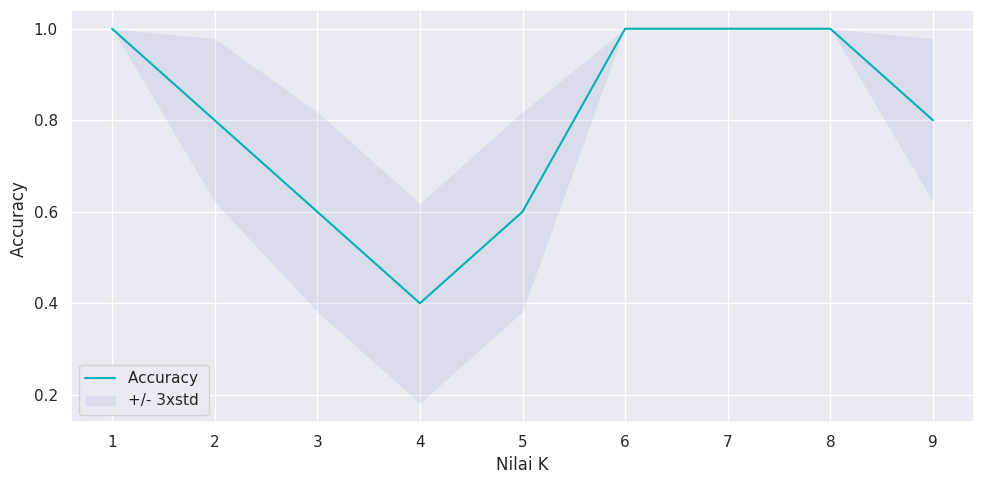

In [50]:
## K-NN ##
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [51]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='') 

Nilai Akurasi terbaik ada pada 100.0% dengan k = 1


### 2.2 Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree_method = DecisionTreeClassifier()
tree_method.fit(X_train, y_train)
y_pred_tree = tree_method.predict(X_test)
score_tree = metrics.accuracy_score(y_pred_tree, y_test)
print('Akurasi Prediksi method Tree : ',round(score_tree,8), ' atau ',round(score_tree*100,2),'%', sep='')

Akurasi Prediksi method Tree : 1.0 atau 100.0%


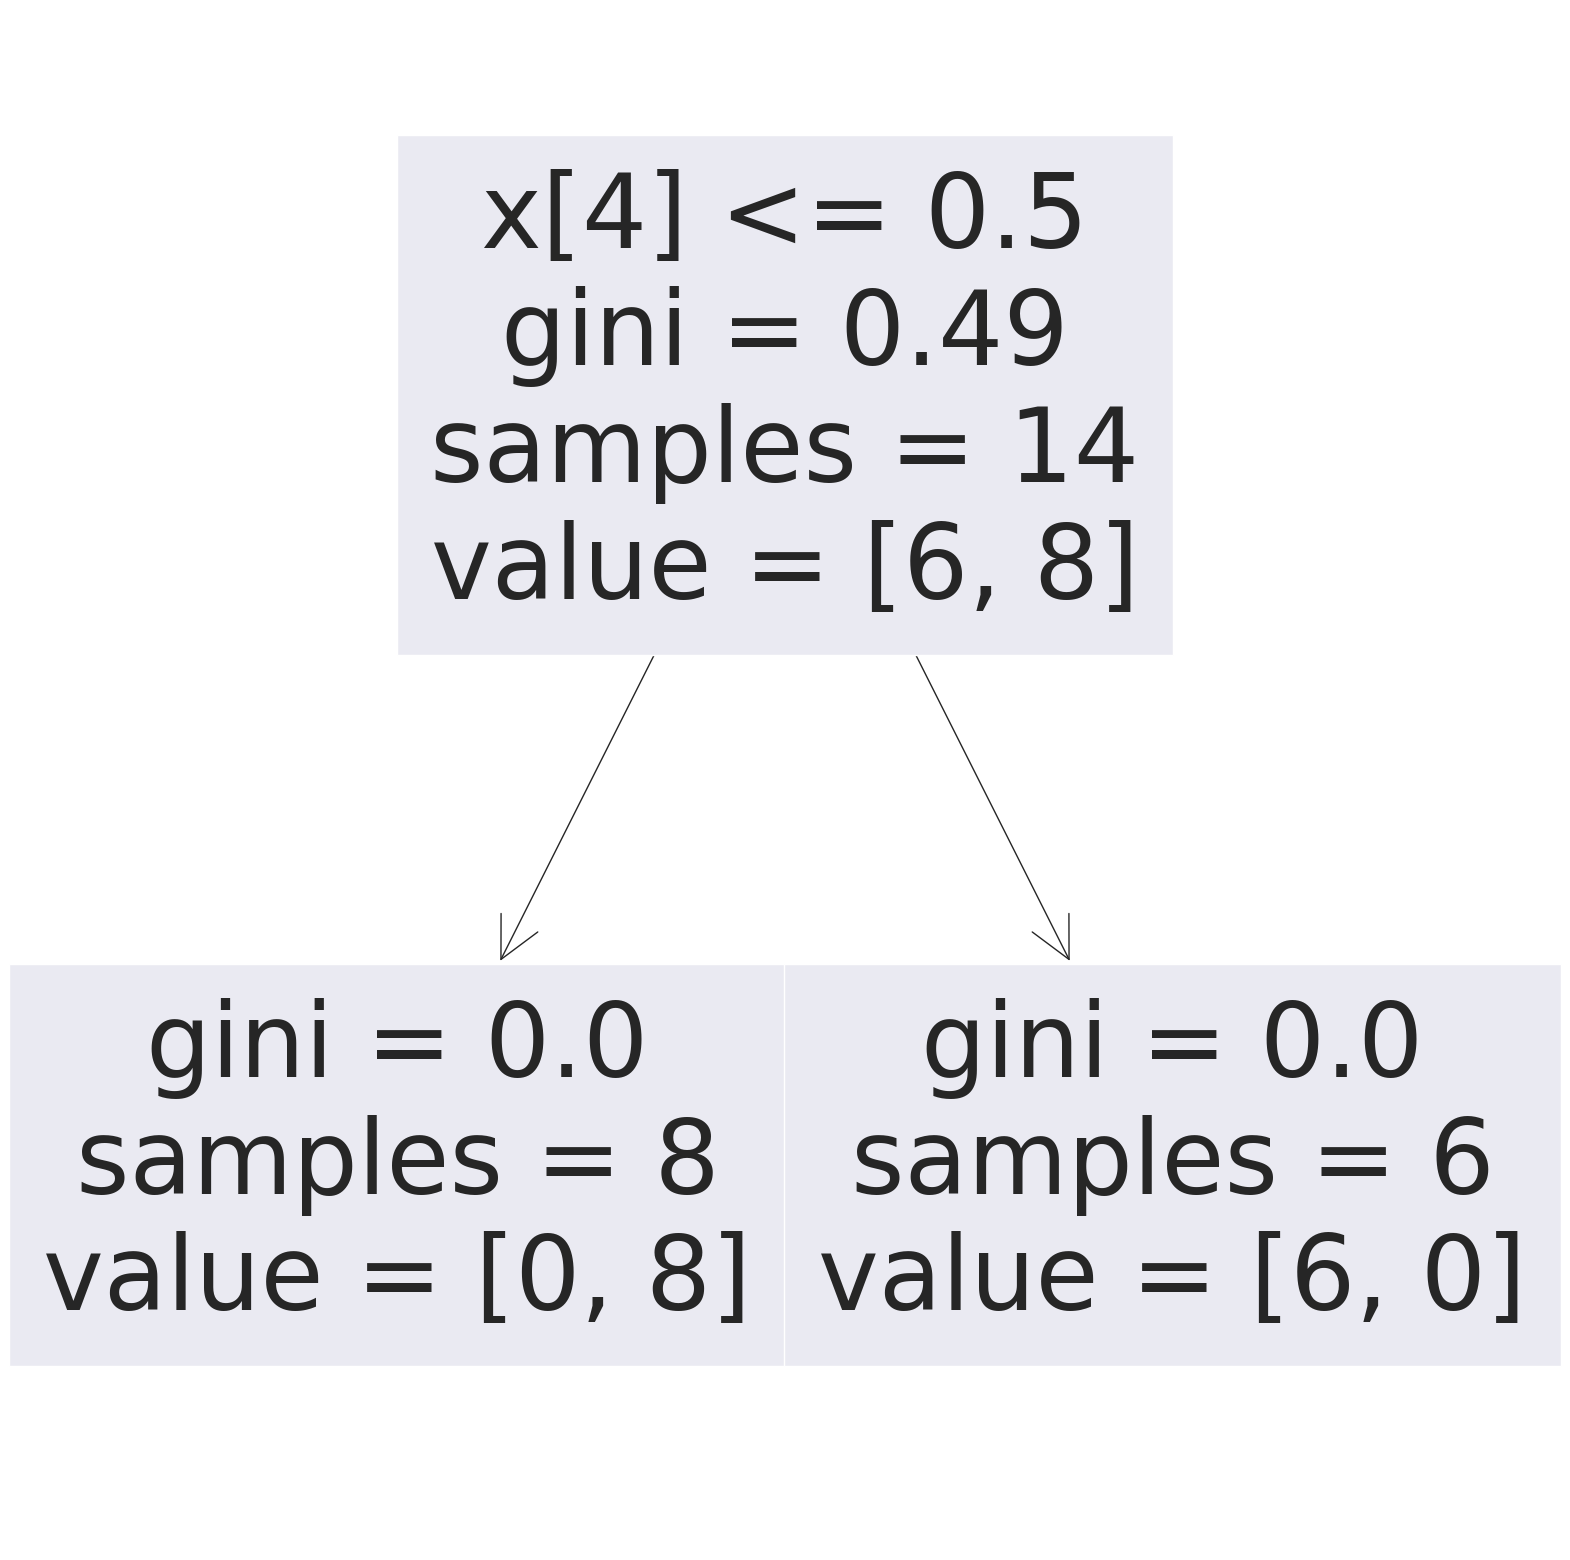

In [54]:
## Evaluasi Model ##

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(tree_method)
plt.show()

### 2.3 Naive Bayes

In [55]:
from sklearn import naive_bayes

In [56]:
bayas_method = naive_bayes.BernoulliNB()
bayas_method.fit(X_train, y_train)
y_pred_bayes = bayas_method.predict(X_test)
score_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(score_bayes,8), ' atau ',round(score_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 1.0 atau 100.0%


## **3. Akuisisi Data**

### 3.1 Membuat Fungsi Confusion Matriks

In [57]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sn.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediksi", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Salah', 'Benar'])
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

### 3.2 Matriks Confution K-NN

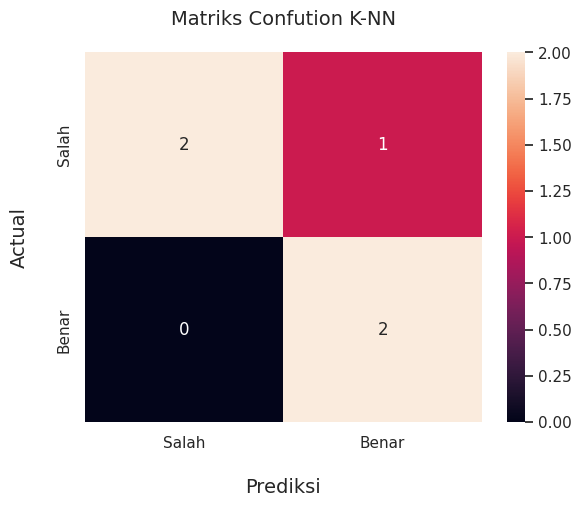

Hasil Confution Matriks :80.0%


In [58]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confution K-NN')

### 3.3 Matriks Confution Decition Tree

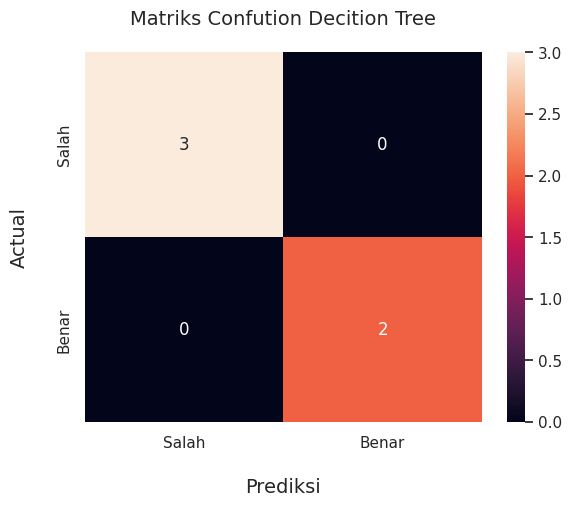

Hasil Confution Matriks :100.0%


In [60]:
get_conf_matriks(y_test, y_pred_tree, title='Matriks Confution Decition Tree')

### 3.4 Matriks Confution Nive Bayes

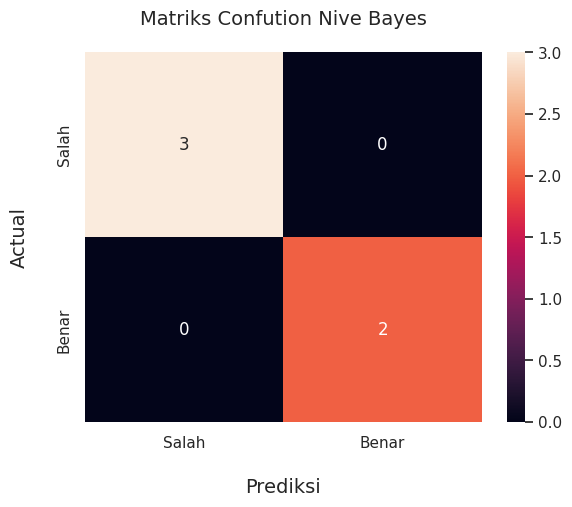

Hasil Confution Matriks :100.0%


In [61]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confution Nive Bayes')

## **4. Kesimpulan**

Dari ketiga metode yang digunakan yaitu K-NN, Decitioin Tree, dan Nive Bayes untuk melakukan clasifiakasi pada data set dengan harapan ditemukan orang yang beresiko kanker atau tidak (normal), dengan melihat Akurasi dan hasil dari Confution Matriks dari ketiga metode. Maka Metode yang terbaik untuk melakukan klasifikasi pada data set yaitu Decision Tree dan Naive Bayes dengan nilai akurasi masing-masing 100%. atau dapat di lihat matriks confusion dari Desicion Tree dan Naive Bayes berikut:

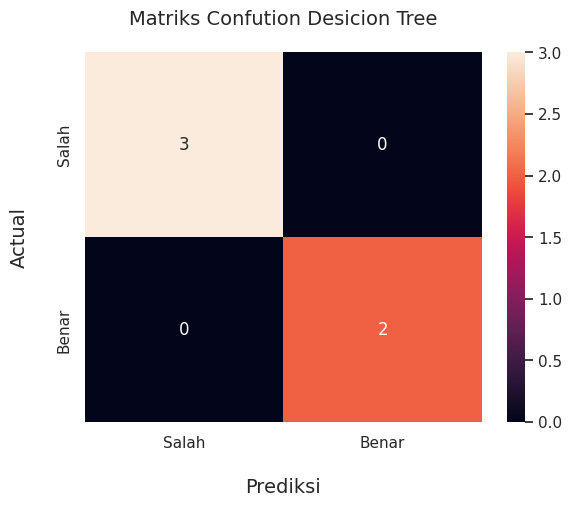

Hasil Confution Matriks :100.0%


In [65]:
get_conf_matriks(y_test, y_pred_tree, title='Matriks Confution Desicion Tree')

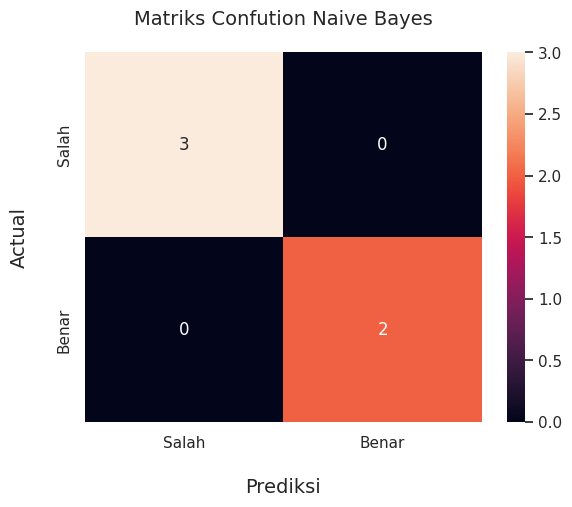

Hasil Confution Matriks :100.0%


In [66]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confution Naive Bayes')

## **5. Regression**

### 5.1 Load Dataset

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('/content/mcs_ds_edited_iter_shuffled.csv')

### 5.2 Analisis Korelasi

In [72]:
df.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


### 5.3 Seleksi Fitur

In [73]:
# Diambil 1 fitur dengan korelasi terbaik terhadap label sd_ale

df = df.drop(['anchor_ratio', 'trans_range','node_density','iterations'], axis=1)

# Menentukan variabel x dan y
x = np.array(df.drop(['sd_ale'], axis=1))
y = df['sd_ale'].values.reshape(-1, 1)

df.head()

,ale,sd_ale
0,0.773546,0.250555
1,0.911941,0.498329
2,0.814867,0.255546
3,1.435332,0.394603
4,1.265909,0.302943


### 5.4 Split Data

In [74]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('Jumlah data train:',len(X_train))
print('Jumlah data test :',len(X_test))

Jumlah data train: 85
Jumlah data test : 22


### 5.5 Linear Regression

In [79]:
# Membuat model regresi linear
reg = LinearRegression()

# Melatih model dengan data latih
reg.fit(X_train, y_train)

# Memprediksi nilai y berdasarkan data uji
y_pred = reg.predict(X_test)

# Menghitung nilai R-squared
r2 = r2_score(y_test, y_pred)
print('R-Squared:',round(r2*100, 2),'%')

R-Squared: 70.38 %


### 5.6 Scatter Plot

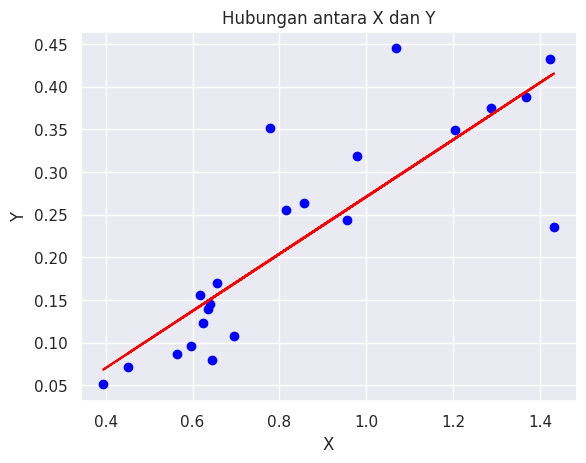

In [80]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Hubungan antara X dan Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **6. Clustering**

### 6.1 Load Dataset

In [81]:
import pandas as pd

df = pd.read_csv('/content/Wholesale customers data.csv')

### 6.2 Menampilkan Dataset

In [82]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 6.3 K-Means

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Men-generate random 2D dataset
X = np.array(df)

# Membuat dan melatih model K-Means clustering dengan k=4
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

### 6.4 Scatter Data

 #### 6.4.1 Channel dan yang lain

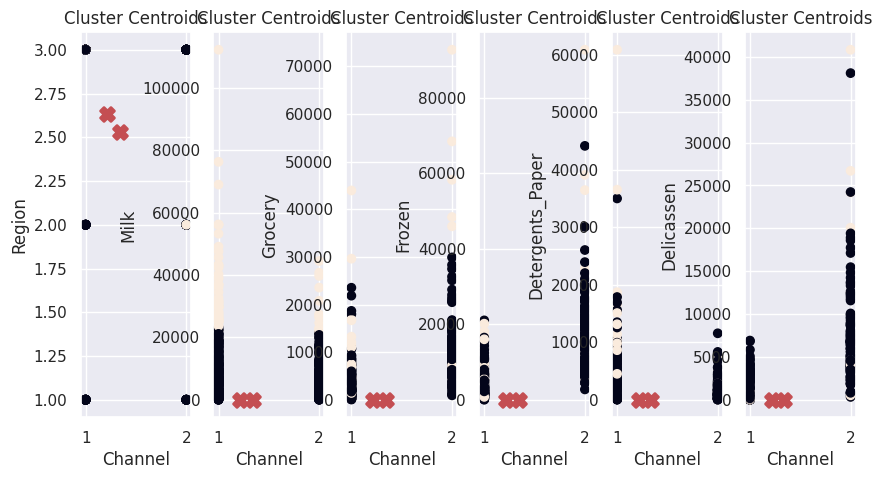

In [108]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(10, 5))

axn = [ax1, ax2, ax3, ax4, ax5, ax6]
fres = ['Region', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 0], X[:, i+1], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Channel')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()

 #### 6.4.2 Region dan yang lain

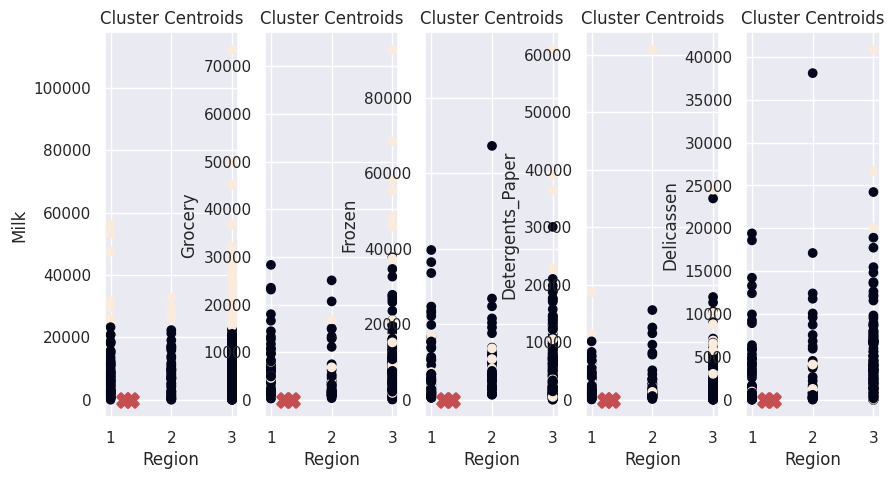

In [112]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10, 5))

axn = [ax1, ax2, ax3, ax4, ax5]
fres = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 1], X[:, i+2], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Region')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()

 #### 6.4.3 Milk dan yang lain

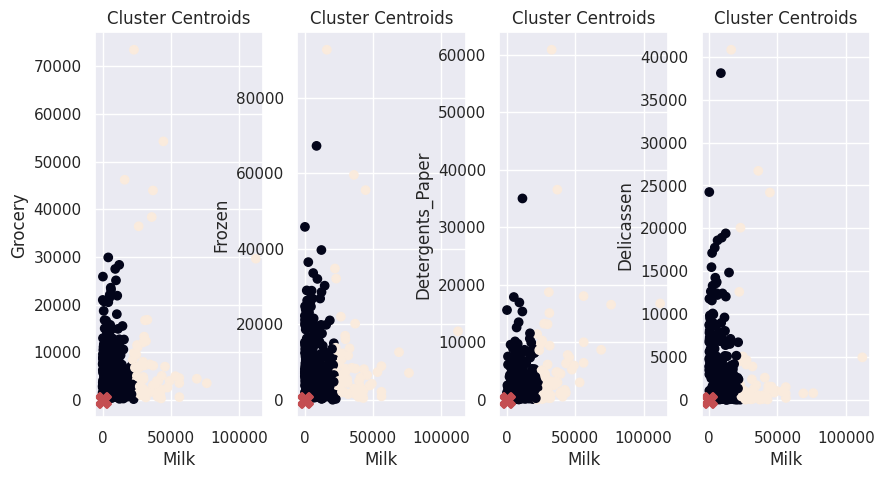

In [113]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

axn = [ax1, ax2, ax3, ax4]
fres = ['Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 2], X[:, i+3], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Milk')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()

 #### 6.4.4 Grocery dan yang lain

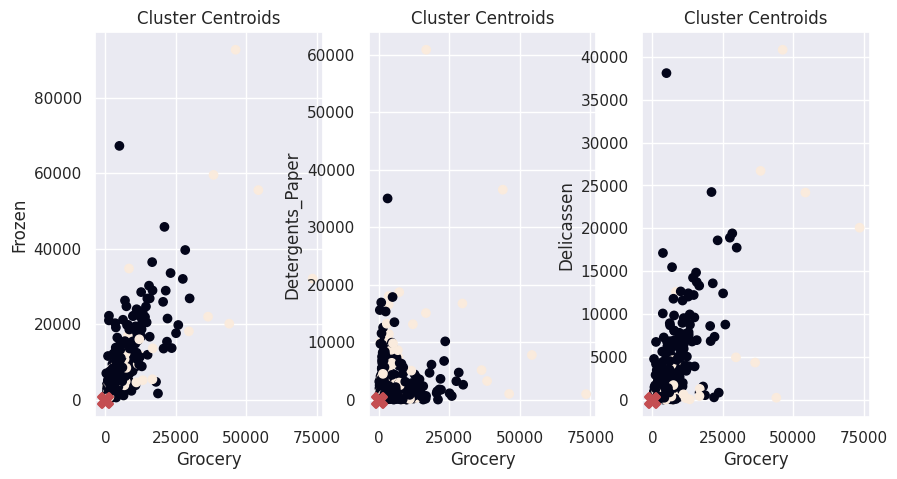

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

axn = [ax1, ax2, ax3]
fres = ['Frozen', 'Detergents_Paper', 'Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 3], X[:, i+4], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Grocery')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()

 #### 6.4.5 Frozen dan yang lain

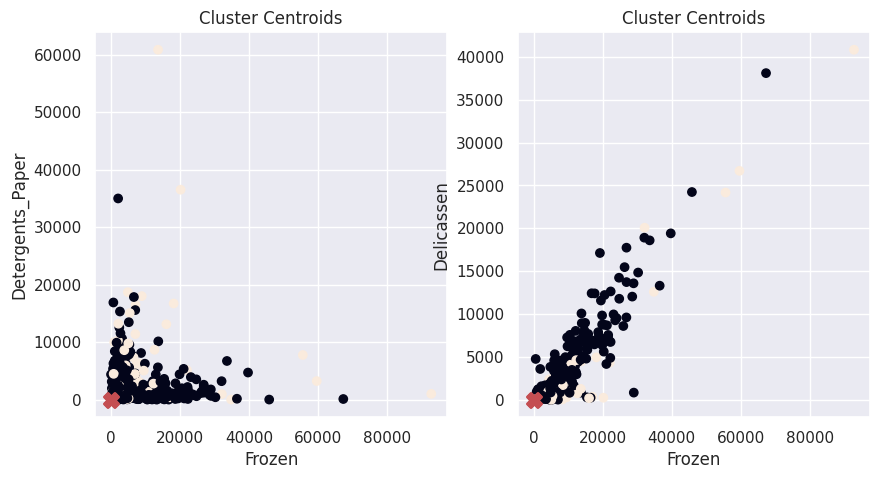

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

axn = [ax1, ax2]
fres = ['Detergents_Paper', 'Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 4], X[:, i+5], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Frozen')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()

 #### 6.4.6 Detergents_Paper dan yang lain

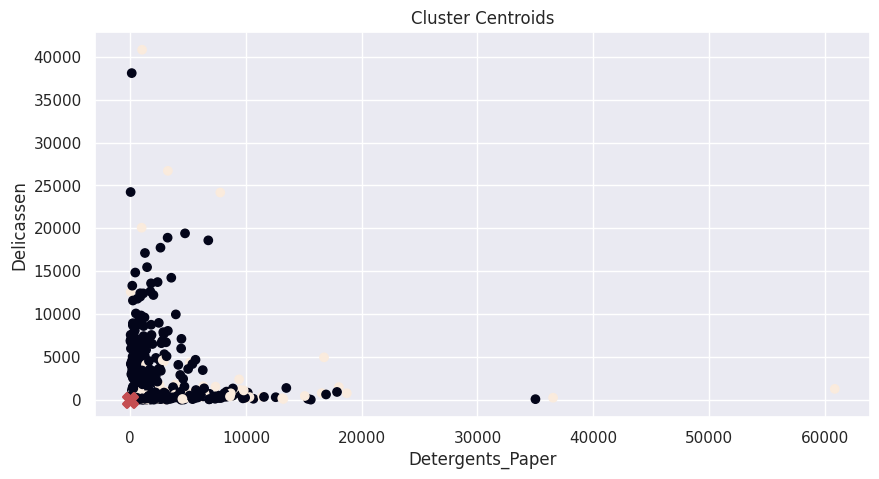

In [117]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

axn = [ax1]
fres = ['Delicassen']

for i in range(len(axn)):
  axn[i].scatter(X[:, 5], X[:, i+6], c=kmeans.labels_)
  axn[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, linewidths=2, c='r')
  axn[i].set_xlabel('Detergents_Paper')
  axn[i].set_ylabel(fres[i])
  axn[i].set_title('Cluster Centroids')

plt.show()